In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [29]:
from os import listdir
from os.path import isfile, join
#This could be improved as a way of locating the original data files
#mypath = '../../../../../1000_Smiles/Data/'
#listdir(mypath)

['.ipynb_checkpoints', 'tscharts-output']

In [30]:
file_prefix = '../../../../../1000_Smiles/Data/'
file_loc = file_prefix+'tscharts-output/clinic_clinic-final.txt'
file_loc2 = file_prefix+'tscharts-output/register_register-final.txt'
file_loc3 = file_prefix+'tscharts-output/patient_massaged-final.txt'

In [31]:
clinicdf = pd.read_csv(file_loc, encoding="latin-1", sep="__", engine ='python')
N = 11
clinicdf = clinicdf.iloc[N: , :]


In [35]:
registerdf = pd.read_csv(file_loc2, encoding="latin-1", sep="__", engine ='python')
merged_df = pd.merge(registerdf, clinicdf, left_on="clinic_id", right_on="id")
patientdf = pd.read_csv(file_loc3, encoding="latin-1", sep="__", engine="python")
merged_df = pd.merge(patientdf, merged_df, left_on="id", right_on="patient_id")


In [36]:
def compute_age(row):
    d1 = datetime.strptime(row["start"], "%Y-%m-%d")
    d2 = datetime.strptime(row["dob"], "%Y-%m-%d")
    diff_in_years = relativedelta(d1, d2)
    return diff_in_years.years

In [37]:
merged_df["age_in_years"] = merged_df.apply(lambda row: compute_age(row), axis=1)
merged_df


,id,dob,gender,city,colonia,state_x,id_x,timein,timeout,state_y,clinic_id,patient_id,id_y,location,start,end,age_in_years
0,1,2005-08-09,f,punta colonet,NaN,BC,588,2021-05-07 09:44:49.715394,2021-05-07 09:44:49.715421,i,15,1,15,Thousand Smiles Ensenada,2021-05-01,2021-05-11,15
1,1,2005-08-09,f,punta colonet,NaN,BC,607,2021-08-06 09:47:35.775716,2021-08-06 09:47:35.775741,i,16,1,16,Thousand Smiles Ensenada,2021-08-01,2021-08-08,15
2,1,2005-08-09,f,punta colonet,NaN,BC,733,2022-05-06 10:01:49.350689,2022-05-06 10:01:49.350714,i,23,1,23,Ensenada,2022-05-06,2022-05-08,16
3,1,2005-08-09,f,punta colonet,NaN,BC,1049,2022-11-04 10:19:36.302828,2022-11-04 10:19:36.302844,i,25,1,25,Ensenada,2022-11-04,2022-11-06,17
4,1,2005-08-09,f,punta colonet,NaN,BC,1153,2023-02-03 08:59:22.584125,2023-02-03 08:59:22.584141,i,30,1,30,Ensenada,2023-02-03,2023-02-05,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,717,1991-06-02,f,Ensenada,Comunidad Indigena,BC,1319,2023-04-01 10:18:19.003334,2023-04-01 10:18:19.003350,i,34,717,34,Ensenada,2023-03-30,2023-04-03,31
741,718,1990-08-13,m,Ensenada,Com. Indigena,BC,1320,2023-04-01 10:24:41.717491,2023-04-01 10:24:41.717507,i,34,718,34,Ensenada,2023-03-30,2023-04-03,32
742,719,1989-11-08,f,Ensenada,Com.Indigena,BC,1321,2023-04-01 10:54:06.016797,2023-04-01 10:54:06.016812,i,34,719,34,Ensenada,2023-03-30,2023-04-03,33
743,720,2017-02-01,f,Ensenada,Com.Indigena,BC,1322,2023-04-01 11:00:04.252226,2023-04-01 11:00:04.252241,i,34,720,34,Ensenada,2023-03-30,2023-04-03,6


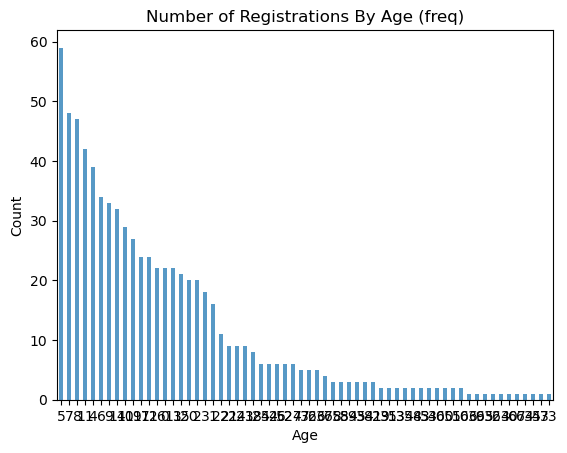

In [38]:
merged_df['age_in_years'].value_counts().plot(kind='bar', alpha=0.75, rot=0)
plt.title("Number of Registrations By Age (freq)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

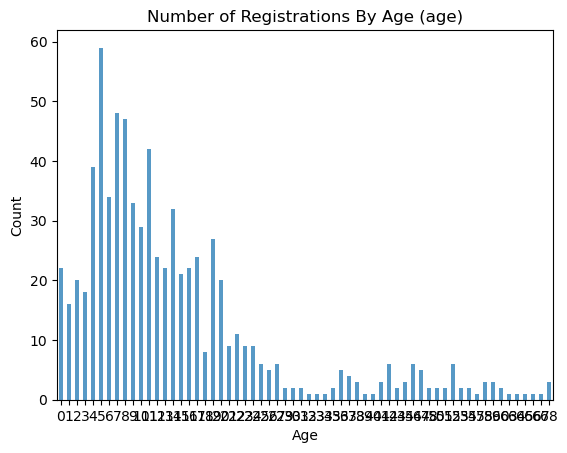

In [39]:
merged_df['age_in_years'].value_counts().sort_index().plot(kind='bar', alpha=0.75, rot=0)
plt.title("Number of Registrations By Age (age)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

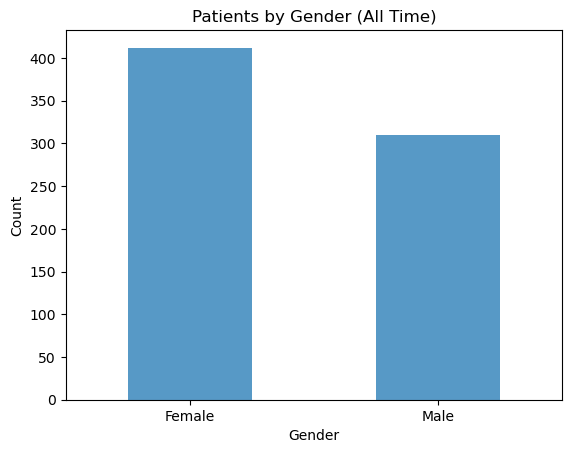

In [41]:
df = pd.read_csv(file_loc3, encoding="latin-1", sep="__", engine="python")

di = {'m': "Male", 'f': "Female"}
df = df.replace({"gender": di})

df['gender'].value_counts().plot(kind='bar', alpha=0.75, rot=0)
plt.title("Patients by Gender (All Time)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 744
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            745 non-null    int64 
 1   dob           745 non-null    object
 2   gender        745 non-null    object
 3   city          708 non-null    object
 4   colonia       669 non-null    object
 5   state_x       745 non-null    object
 6   id_x          745 non-null    int64 
 7   timein        745 non-null    object
 8   timeout       745 non-null    object
 9   state_y       745 non-null    object
 10  clinic_id     745 non-null    int64 
 11  patient_id    745 non-null    int64 
 12  id_y          745 non-null    int64 
 13  location      745 non-null    object
 14  start         745 non-null    object
 15  end           745 non-null    object
 16  age_in_years  745 non-null    int64 
dtypes: int64(6), object(11)
memory usage: 104.8+ KB


In [44]:
merged_df.describe()

,id,id_x,clinic_id,patient_id,id_y,age_in_years
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,438.540940,951.000000,24.868456,438.540940,24.868456,14.542282
std,175.678497,215.207264,4.776048,175.678497,4.776048,13.320537
min,1.000000,579.000000,14.000000,1.000000,14.000000,0.000000
25%,343.000000,765.000000,23.000000,343.000000,23.000000,6.000000
50%,440.000000,951.000000,25.000000,440.000000,25.000000,11.000000
75%,582.000000,1137.000000,30.000000,582.000000,30.000000,18.000000
max,721.000000,1323.000000,34.000000,721.000000,34.000000,68.000000


In [45]:
merged_df.nunique()

id              445
dob             429
gender            2
city             55
colonia         284
state_x           3
id_x            745
timein          745
timeout         745
state_y           1
clinic_id        12
patient_id      445
id_y             12
location          2
start            12
end              12
age_in_years     62
dtype: int64